In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

matches_df = pd.read_csv('matches.csv')
delivery_df = pd.read_csv('deliveries.csv')

In [3]:
matches_df.shape, delivery_df.shape


((1095, 20), (260920, 17))

In [4]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
matches_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [9]:
delivery_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [10]:
matches_df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [11]:
delivery_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [12]:
merged_df = delivery_df.merge(matches_df,how='left',left_on='match_id',right_on='id')

In [13]:
merged_df.shape

(260920, 37)

In [14]:
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [16]:
merged_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
id                       0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
d

In [17]:

team_mapping = {
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad',
}

team_columns = ['team1', 'team2', 'toss_winner', 'winner', 'batting_team', 'bowling_team']

for col in team_columns:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].replace(team_mapping)


In [18]:
print(merged_df.head(10))

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
5    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
6    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
7    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   
8    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   
9    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   

   ball       batter   bowler  non_striker  batsman_runs  ...  toss_decision  \
0     1   SC Ganguly  P Kuma

In [19]:

merged_df.drop(columns=['id', 'date', 'result', 'result_margin'], inplace=True)

In [20]:
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team2,toss_winner,toss_decision,winner,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [22]:
#aggregate delivery data to match level
match_agg = merged_df.groupby('match_id').agg({
    'batsman_runs': 'sum',
    'extra_runs': 'sum',
    'total_runs': 'sum',
    'is_wicket': 'sum',
    'ball':'count',
    'inning': 'nunique'
    
}).reset_index()

match_agg.rename(columns={
    'batsman_runs': 'total_batsman_runs',
    'extra_runs': 'total_extra_runs',
    'total_runs': 'total_runs',
    'is_wicket': 'total_wickets',
    'ball': 'total_balls_played',
    'inning': 'innings_count'
}, inplace=True)

match_agg.head()


,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,innings_count
0,335982,268,36,304,13,225,2
1,335983,430,17,447,9,248,2
2,335984,244,17,261,9,219,2
3,335985,315,16,331,12,246,2
4,335986,184,38,222,15,240,2


In [23]:
match_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   match_id            1095 non-null   int64
 1   total_batsman_runs  1095 non-null   int64
 2   total_extra_runs    1095 non-null   int64
 3   total_runs          1095 non-null   int64
 4   total_wickets       1095 non-null   int64
 5   total_balls_played  1095 non-null   int64
 6   innings_count       1095 non-null   int64
dtypes: int64(7)
memory usage: 60.0 KB


In [24]:

meta_cols = ['match_id', 'batting_team','bowling_team','season', 'city', 'venue', 'toss_winner', 'toss_decision',
             'match_type', 'super_over', 'method', 'winner']

match_meta = merged_df.drop_duplicates(subset='match_id')[meta_cols]

final_df = pd.merge(match_agg, match_meta, on='match_id')

final_df = final_df.dropna(subset=['winner'])


In [25]:
final_df.shape

(1090, 18)

In [26]:
final_df.head()

,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,innings_count,batting_team,bowling_team,season,city,venue,toss_winner,toss_decision,match_type,super_over,method,winner
0,335982,268,36,304,13,225,2,Kolkata Knight Riders,Royal Challengers Bengaluru,2007/08,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,League,N,NaN,Kolkata Knight Riders
1,335983,430,17,447,9,248,2,Chennai Super Kings,Punjab Kings,2007/08,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,League,N,NaN,Chennai Super Kings
2,335984,244,17,261,9,219,2,Rajasthan Royals,Delhi Capitals,2007/08,Delhi,Feroz Shah Kotla,Rajasthan Royals,bat,League,N,NaN,Delhi Capitals
3,335985,315,16,331,12,246,2,Mumbai Indians,Royal Challengers Bengaluru,2007/08,Mumbai,Wankhede Stadium,Mumbai Indians,bat,League,N,NaN,Royal Challengers Bengaluru
4,335986,184,38,222,15,240,2,Sunrisers Hyderabad,Kolkata Knight Riders,2007/08,Kolkata,Eden Gardens,Sunrisers Hyderabad,bat,League,N,NaN,Kolkata Knight Riders


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            1090 non-null   int64 
 1   total_batsman_runs  1090 non-null   int64 
 2   total_extra_runs    1090 non-null   int64 
 3   total_runs          1090 non-null   int64 
 4   total_wickets       1090 non-null   int64 
 5   total_balls_played  1090 non-null   int64 
 6   innings_count       1090 non-null   int64 
 7   batting_team        1090 non-null   object
 8   bowling_team        1090 non-null   object
 9   season              1090 non-null   object
 10  city                1039 non-null   object
 11  venue               1090 non-null   object
 12  toss_winner         1090 non-null   object
 13  toss_decision       1090 non-null   object
 14  match_type          1090 non-null   object
 15  super_over          1090 non-null   object
 16  method              21 non-nu

In [28]:
final_df.isnull().sum()

match_id                 0
total_batsman_runs       0
total_extra_runs         0
total_runs               0
total_wickets            0
total_balls_played       0
innings_count            0
batting_team             0
bowling_team             0
season                   0
city                    51
venue                    0
toss_winner              0
toss_decision            0
match_type               0
super_over               0
method                1069
winner                   0
dtype: int64

In [29]:
final_df.drop(columns=['method'], inplace=True)
final_df['city'].fillna('Unknown', inplace=True)


C:\Users\tvisha.k\AppData\Local\Temp\ipykernel_14636\2899667354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['city'].fillna('Unknown', inplace=True)


In [30]:
final_df.shape

(1090, 17)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            1090 non-null   int64 
 1   total_batsman_runs  1090 non-null   int64 
 2   total_extra_runs    1090 non-null   int64 
 3   total_runs          1090 non-null   int64 
 4   total_wickets       1090 non-null   int64 
 5   total_balls_played  1090 non-null   int64 
 6   innings_count       1090 non-null   int64 
 7   batting_team        1090 non-null   object
 8   bowling_team        1090 non-null   object
 9   season              1090 non-null   object
 10  city                1090 non-null   object
 11  venue               1090 non-null   object
 12  toss_winner         1090 non-null   object
 13  toss_decision       1090 non-null   object
 14  match_type          1090 non-null   object
 15  super_over          1090 non-null   object
 16  winner              1090 non-

In [32]:
final_df.head()

,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,innings_count,batting_team,bowling_team,season,city,venue,toss_winner,toss_decision,match_type,super_over,winner
0,335982,268,36,304,13,225,2,Kolkata Knight Riders,Royal Challengers Bengaluru,2007/08,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,League,N,Kolkata Knight Riders
1,335983,430,17,447,9,248,2,Chennai Super Kings,Punjab Kings,2007/08,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,League,N,Chennai Super Kings
2,335984,244,17,261,9,219,2,Rajasthan Royals,Delhi Capitals,2007/08,Delhi,Feroz Shah Kotla,Rajasthan Royals,bat,League,N,Delhi Capitals
3,335985,315,16,331,12,246,2,Mumbai Indians,Royal Challengers Bengaluru,2007/08,Mumbai,Wankhede Stadium,Mumbai Indians,bat,League,N,Royal Challengers Bengaluru
4,335986,184,38,222,15,240,2,Sunrisers Hyderabad,Kolkata Knight Riders,2007/08,Kolkata,Eden Gardens,Sunrisers Hyderabad,bat,League,N,Kolkata Knight Riders


In [33]:
# drop columns match_type, super_over, innings_count
final_df.drop(columns=['match_type', 'super_over', 'innings_count'], inplace=True)
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            1090 non-null   int64 
 1   total_batsman_runs  1090 non-null   int64 
 2   total_extra_runs    1090 non-null   int64 
 3   total_runs          1090 non-null   int64 
 4   total_wickets       1090 non-null   int64 
 5   total_balls_played  1090 non-null   int64 
 6   batting_team        1090 non-null   object
 7   bowling_team        1090 non-null   object
 8   season              1090 non-null   object
 9   city                1090 non-null   object
 10  venue               1090 non-null   object
 11  toss_winner         1090 non-null   object
 12  toss_decision       1090 non-null   object
 13  winner              1090 non-null   object
dtypes: int64(6), object(8)
memory usage: 127.7+ KB


,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,batting_team,bowling_team,season,city,venue,toss_winner,toss_decision,winner
0,335982,268,36,304,13,225,Kolkata Knight Riders,Royal Challengers Bengaluru,2007/08,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
1,335983,430,17,447,9,248,Chennai Super Kings,Punjab Kings,2007/08,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings
2,335984,244,17,261,9,219,Rajasthan Royals,Delhi Capitals,2007/08,Delhi,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals
3,335985,315,16,331,12,246,Mumbai Indians,Royal Challengers Bengaluru,2007/08,Mumbai,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bengaluru
4,335986,184,38,222,15,240,Sunrisers Hyderabad,Kolkata Knight Riders,2007/08,Kolkata,Eden Gardens,Sunrisers Hyderabad,bat,Kolkata Knight Riders


In [34]:
# check unique values in winner column
print(final_df['winner'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Gujarat Titans' 'Lucknow Super Giants']


In [35]:
# Drop matches where winner was a defunct team
defunct_teams = [
    'Pune Warriors',
    'Kochi Tuskers Kerala',
    'Rising Pune Supergiant',
    'Rising Pune Supergiants',
    'Gujarat Lions'
]

# Drop rows where winner is a defunct team
final_df = final_df[~final_df['winner'].isin(defunct_teams)]
final_df.shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            1044 non-null   int64 
 1   total_batsman_runs  1044 non-null   int64 
 2   total_extra_runs    1044 non-null   int64 
 3   total_runs          1044 non-null   int64 
 4   total_wickets       1044 non-null   int64 
 5   total_balls_played  1044 non-null   int64 
 6   batting_team        1044 non-null   object
 7   bowling_team        1044 non-null   object
 8   season              1044 non-null   object
 9   city                1044 non-null   object
 10  venue               1044 non-null   object
 11  toss_winner         1044 non-null   object
 12  toss_decision       1044 non-null   object
 13  winner              1044 non-null   object
dtypes: int64(6), object(8)
memory usage: 122.3+ KB


In [36]:
print(final_df['winner'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Titans'
 'Lucknow Super Giants']


In [37]:
# Remove rows with defunct toss_winners
final_df = final_df[~final_df['toss_winner'].isin(defunct_teams)]
final_df =final_df[~final_df['batting_team'].isin(defunct_teams)]
final_df = final_df[~final_df['bowling_team'].isin(defunct_teams)]


In [38]:
valid_ipl_cities = [
    'Ahmedabad',
    'Bengaluru',        
    'Chandigarh',       
    'Chennai',
    'Delhi',
    'Dharamsala',
    'Guwahati',
    'Hyderabad',
    'Indore',
    'Jaipur',
    'Kolkata',
    'Lucknow',
    'Mohali',
    'Mumbai',
    'Nagpur',
    'Pune',
    'Raipur',
    'Ranchi',
    'Rajkot',
    'Visakhapatnam'
]
# Filter out rows with invalid cities
final_df = final_df[final_df['city'].isin(valid_ipl_cities)]


In [39]:
venue_mapping = {
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium',
    
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    
    'Eden Gardens, Kolkata': 'Eden Gardens',
    
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    
    'Barsapara Cricket Stadium, Guwahati': 'Barsapara Cricket Stadium',
    
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium',
    
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium',
   
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Mullanpur Stadium'
}

# Apply the mapping to the 'venue' column
final_df['venue'] = final_df['venue'].replace(venue_mapping)


In [40]:
final_df.shape

(739, 14)

In [41]:
# check unique values in toss_decision, toss_winner, city, venue columns
print("Unique toss decisions:", final_df['toss_decision'].unique())
print("Unique toss winners:", final_df['toss_winner'].unique())
print("Unique cities:", final_df['city'].unique())
print("Unique venues:", final_df['venue'].unique())
print("Unique winners:", final_df['winner'].unique())


Unique toss decisions: ['bat' 'field']
Unique toss winners: ['Chennai Super Kings' 'Rajasthan Royals' 'Mumbai Indians'
 'Sunrisers Hyderabad' 'Punjab Kings' 'Kolkata Knight Riders'
 'Delhi Capitals' 'Royal Challengers Bengaluru' 'Gujarat Titans'
 'Lucknow Super Giants']
Unique cities: ['Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad' 'Chennai'
 'Ahmedabad' 'Nagpur' 'Dharamsala' 'Visakhapatnam' 'Pune' 'Raipur'
 'Ranchi' 'Bengaluru' 'Indore' 'Lucknow' 'Guwahati' 'Mohali']
Unique venues: ['Punjab Cricket Association Stadium' 'Arun Jaitley Stadium'
 'Wankhede Stadium' 'Eden Gardens' 'Sawai Mansingh Stadium'
 'Rajiv Gandhi International Stadium' 'MA Chidambaram Stadium'
 'Dr DY Patil Sports Academy' 'Brabourne Stadium' 'Narendra Modi Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA 

In [42]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoders = {}

categorical_cols = ['city', 'venue', 'toss_winner', 
                    'toss_decision', 'winner','batting_team', 'bowling_team']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col].astype(str))
    label_encoders[col] = le
    


In [43]:
final_df.head()

,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,batting_team,bowling_team,season,city,venue,toss_winner,toss_decision,winner
1,335983,430,17,447,9,248,0,6,2007/08,2,15,0,0,0
2,335984,244,17,261,9,219,7,1,2007/08,4,0,7,0,1
3,335985,315,16,331,12,246,5,8,2007/08,13,21,5,0,8
4,335986,184,38,222,15,240,9,3,2007/08,10,6,9,0,3
5,335987,318,16,334,12,241,6,7,2007/08,9,17,6,0,7


In [44]:

final_df['season'] = final_df['season'].str.extract(r'(\d{4})').astype(int)


In [45]:
final_df.head()

,match_id,total_batsman_runs,total_extra_runs,total_runs,total_wickets,total_balls_played,batting_team,bowling_team,season,city,venue,toss_winner,toss_decision,winner
1,335983,430,17,447,9,248,0,6,2007,2,15,0,0,0
2,335984,244,17,261,9,219,7,1,2007,4,0,7,0,1
3,335985,315,16,331,12,246,5,8,2007,13,21,5,0,8
4,335986,184,38,222,15,240,9,3,2007,10,6,9,0,3
5,335987,318,16,334,12,241,6,7,2007,9,17,6,0,7


In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 1 to 1094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   match_id            739 non-null    int64
 1   total_batsman_runs  739 non-null    int64
 2   total_extra_runs    739 non-null    int64
 3   total_runs          739 non-null    int64
 4   total_wickets       739 non-null    int64
 5   total_balls_played  739 non-null    int64
 6   batting_team        739 non-null    int64
 7   bowling_team        739 non-null    int64
 8   season              739 non-null    int64
 9   city                739 non-null    int64
 10  venue               739 non-null    int64
 11  toss_winner         739 non-null    int64
 12  toss_decision       739 non-null    int64
 13  winner              739 non-null    int64
dtypes: int64(14)
memory usage: 86.6 KB


In [47]:
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['match_id', 'winner'])
y = final_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), params, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

rf = RandomForestClassifier(**grid.best_params_, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline Accuracy: {accuracy:.2f}')



{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
0.5491457844570719
Baseline Accuracy: 0.60


In [49]:
y.value_counts(normalize=True)


winner
5    0.144790
0    0.139378
3    0.127199
7    0.117727
9    0.106901
1    0.102842
6    0.102842
8    0.090663
2    0.036536
4    0.031123
Name: proportion, dtype: float64

In [50]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1_macro)


F1 Score (macro): 0.5348029959804007


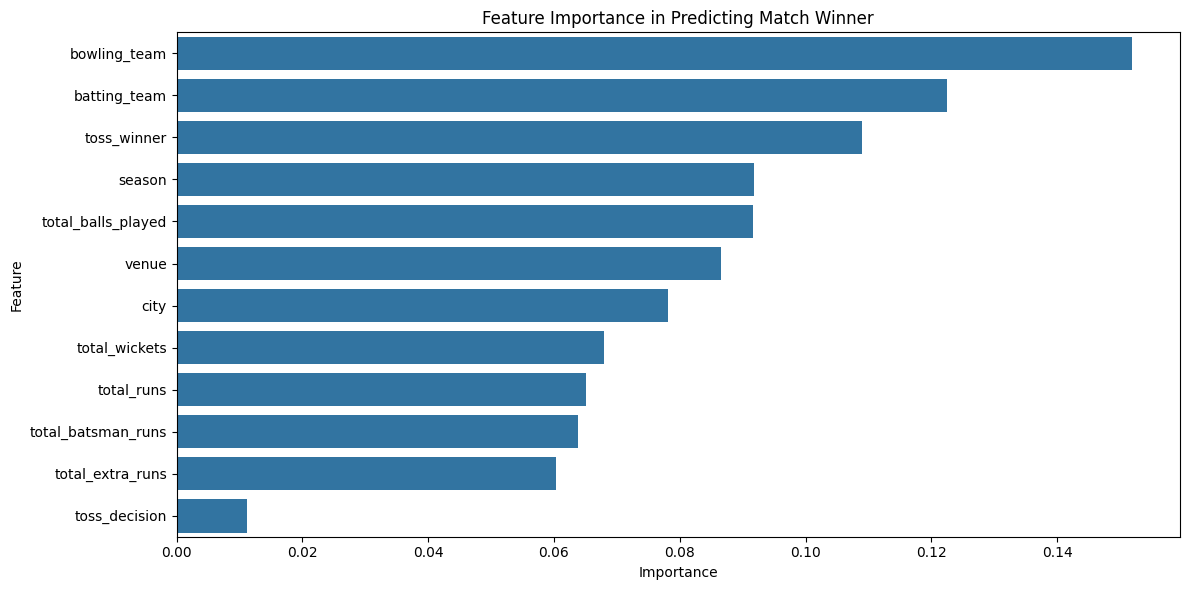


Feature Importance Values:
               feature  importance
6         bowling_team    0.151954
5         batting_team    0.122535
10         toss_winner    0.108995
7               season    0.091766
4   total_balls_played    0.091630
9                venue    0.086604
8                 city    0.078105
3        total_wickets    0.067984
2           total_runs    0.065088
0   total_batsman_runs    0.063785
1     total_extra_runs    0.060294
11       toss_decision    0.011260


In [51]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Match Winner')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print actual importance values
print("\nFeature Importance Values:")
print(feature_importance)

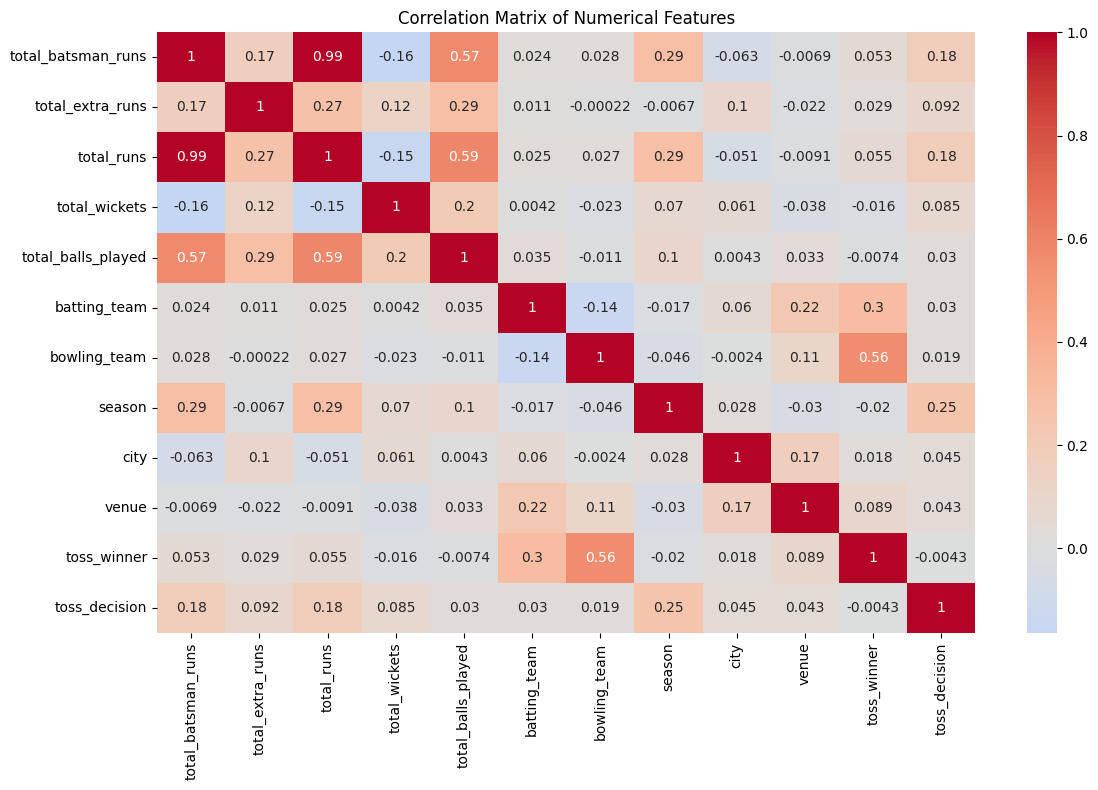


Numerical Features Statistics:
       total_batsman_runs  total_extra_runs  total_runs  total_wickets  \
count          591.000000        591.000000  591.000000     591.000000   
mean           306.720812         16.683587  323.404399      12.018613   
std             59.102022          6.479672   60.516763       3.057859   
min            117.000000          2.000000  135.000000       4.000000   
25%            271.000000         12.000000  287.500000      10.000000   
50%            308.000000         16.000000  325.000000      12.000000   
75%            343.500000         20.000000  359.000000      14.000000   
max            520.000000         45.000000  549.000000      20.000000   

       total_balls_played  batting_team  bowling_team       season  \
count          591.000000    591.000000    591.000000   591.000000   
mean           239.150592      4.817259      4.622673  2016.756345   
std             19.557373      3.010227      2.994587     5.335032   
min            106.00

In [52]:
# Correlation analysis for numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = X_train[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print basic statistics of numerical features
print("\nNumerical Features Statistics:")
print(X_train[numerical_cols].describe())

In [53]:
# use optuna
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_categorical('max_depth', [5, 10, None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        class_weight='balanced',
        random_state=42
    )
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    return f1_score(y_test, y_pred, average='macro')
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters:", study.best_params)
print("Best F1 Score (macro):", study.best_value)


[I 2025-06-25 17:33:51,701] A new study created in memory with name: no-name-66266870-65b3-4fcb-89ce-c6459a47fb52
[I 2025-06-25 17:33:52,426] Trial 0 finished with value: 0.5448915872055617 and parameters: {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 4}. Best is trial 0 with value: 0.5448915872055617.
[I 2025-06-25 17:33:53,104] Trial 1 finished with value: 0.528952600684308 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 7}. Best is trial 0 with value: 0.5448915872055617.
[I 2025-06-25 17:33:53,290] Trial 2 finished with value: 0.5201812209235326 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 0 with value: 0.5448915872055617.
[I 2025-06-25 17:33:53,393] Trial 3 finished with value: 0.49366875874802707 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: 0.5448915872055617.
[I 2025-06-25 17:33:53,642] Trial 4 finished with value: 0.5163272547

Best hyperparameters: {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 5}
Best F1 Score (macro): 0.5745073994406587


In [54]:
#train the model with best hyperparameters
best_params = study.best_params 
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    class_weight='balanced',
    random_state=42
)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_macro_best = f1_score(y_test, y_pred_best, average='macro')
print(f'Optimized Model Accuracy: {accuracy_best:.2f}')
print("Optimized F1 Score (macro):", f1_macro_best)


Optimized Model Accuracy: 0.62
Optimized F1 Score (macro): 0.5745073994406587
